In [1]:
%%capture
pip install pandas opencv-python matplotlib

In [2]:
from os import getenv
from glob import glob

def get_stage_path(inside_stage, outside_stage):
    if getenv('INSIDE_STAGE'):
        return f"/home/input/{inside_stage}"
    else:
        stages_directory = '../../stages'
        matched_stages = glob(f'{stages_directory}/*_{outside_stage}')
        outside_stage = matched_stages[0].split('/')[-1]
        return f"{stages_directory}/{outside_stage}"

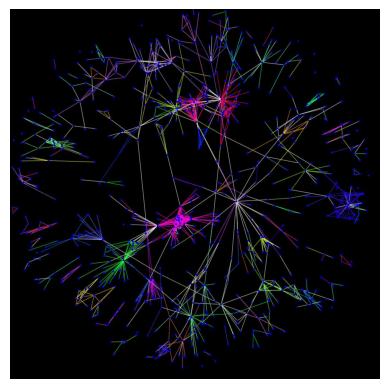

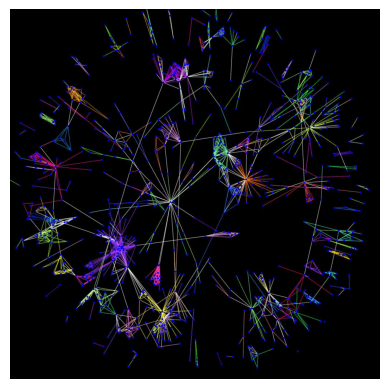

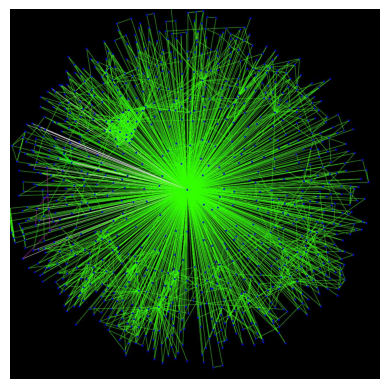

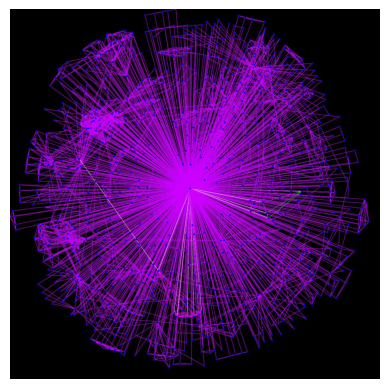

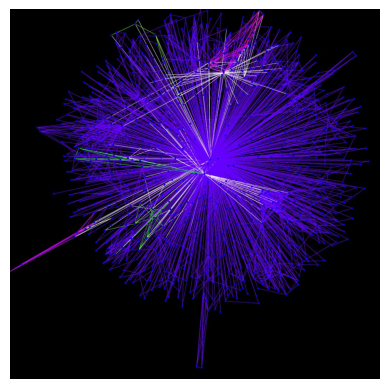

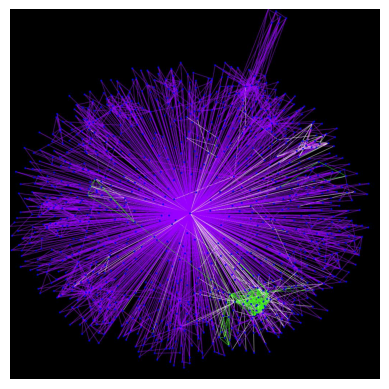

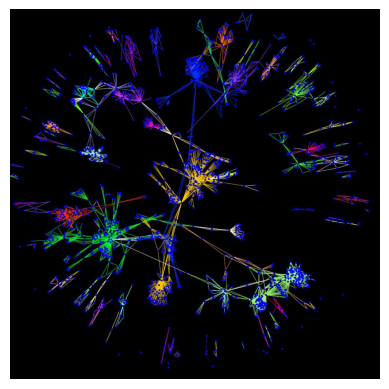

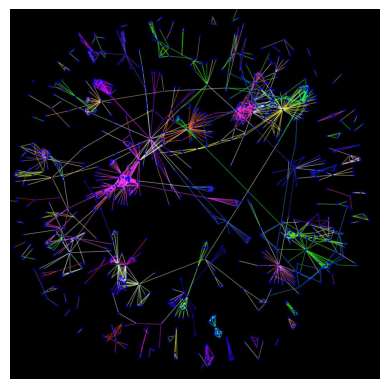

In [3]:
from IPython.display import Image, display
import pandas as pd
import cv2
import matplotlib.pyplot as plt

stage_path = get_stage_path('main', 'draw_community_structure_with_satgraf')

def read_dataframe(stage_path, file=None):
    if not file:
        file = 'output'
    df = pd.read_csv(f'{stage_path}/{file}.csv')
    return df

df = read_dataframe(stage_path)
for file in df['jpg_file'].dropna():
    image = cv2.imread(f'{stage_path}/{file}')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()